In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.linear_model import LinearRegression


In [78]:
data1.isna().sum()

x    0
y    1
dtype: int64

In [79]:
data1 = pd.read_csv("train.csv")
data2 = pd.read_csv('test.csv')

In [80]:
dt1=data1.dropna()
dt2=data2.dropna()

In [81]:
dt1.isnull().sum()

x    0
y    0
dtype: int64

In [82]:
dt2.isnull().sum()

x    0
y    0
dtype: int64

In [83]:
Lr = LinearRegression(normalize=True)

In [84]:
x_train = dt1[['x']]
y_train = dt1['y']

In [85]:
x_test = dt2[['x']]
y_test = dt2['y']

In [86]:
Lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [87]:
Train_Score = Lr.score(x_train,y_train)
Train_Score

0.9907015319025518

In [88]:
Lr.fit(x_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [89]:
Test_score = Lr.score(x_test,y_test)

In [90]:
Test_score

0.9891203611402716

In [91]:
New_Pred = Lr.predict(x_test)
New_Pred

array([ 77.64201157,  20.83923168,  21.85356704,  19.82489633,
        36.05426201,  14.75321955,  62.42698124,  95.90004796,
        19.82489633,   4.609866  ,   3.59553065,  18.81056097,
        96.91438332,  62.42698124,  36.05426201,  14.75321955,
        65.46998731,  13.7388842 ,  87.78536512,  69.52732873,
        89.81403583,  51.26929234,  89.81403583,  26.92524381,
        97.92871867,  58.36963982,  79.67068228,  20.83923168,
        93.87137725,  26.92524381,  99.95738938,  30.98258524,
        33.01125595,  80.68501764,  27.93957917,  47.21195092,
        53.29796305,  69.52732873,  27.93957917,  33.01125595,
        91.84270654,  71.55599944,  50.25495698,  76.62767622,
         3.59553065,  37.06859737,  70.54166408,  68.51299337,
        40.11160343,  35.03992666,  94.88571261,  88.79970048,
        52.28362769,  30.98258524,  59.38397518,  -0.46181077,
        39.09726808,  64.45565195,  69.52732873,  57.35530447,
        12.72454884,  72.57033479,  76.62767622,  61.41

In [121]:
Data = pd.DataFrame({'New_Prediction':New_Pred,
                     'Actual_Data':y_test}, index=np.arange(300))
Data

,New_Prediction,Actual_Data
0,77.642012,79.775152
1,20.839232,23.177279
2,21.853567,25.609262
3,19.824896,17.857388
4,36.054262,41.849864
5,14.753220,9.805235
6,62.426981,58.874659
7,95.900048,97.617937
8,19.824896,18.395127
9,4.609866,8.746748


In [95]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [96]:
r2_score(y_test,New_Pred)

0.9891203611402716

In [101]:
mean_absolute_error(y_test,New_Pred)

2.410524352689128

In [102]:
mean_squared_error(y_test,New_Pred)

9.164287860614264

In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
cv = cross_val_score(Lr,x_train,y_train,cv = 20)

In [105]:
cv

array([0.99028872, 0.98821483, 0.98668645, 0.98961171, 0.99309076,
       0.98695483, 0.98912024, 0.98630777, 0.987217  , 0.99395628,
       0.99398612, 0.99225872, 0.98832487, 0.99062613, 0.99225434,
       0.98894076, 0.99023126, 0.99374311, 0.98760931, 0.99071867])

In [106]:
np.mean(cv)

0.9900070945412065

In [107]:
np.max(cv)

0.9939861249352869

In [108]:
np.min(cv)

0.986307771403265

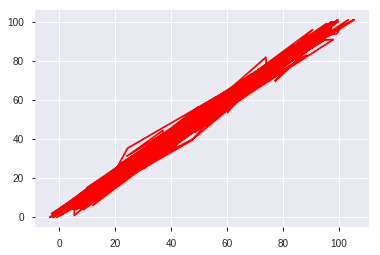

In [114]:
plt.plot(y_test,New_Pred,'r')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


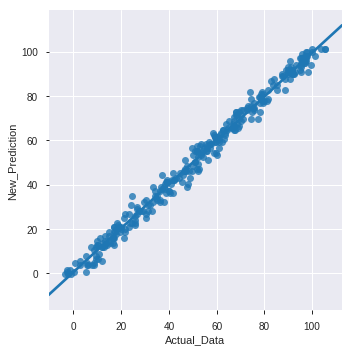

In [131]:
sns.lmplot(x='Actual_Data',y='New_Prediction',data=Data)

In [127]:
Data.columns

Index(['New_Prediction', 'Actual_Data'], dtype='object')